# Problem 4: Bear Multi-Label Classication

In [2]:
from fastbook import *

### Search for images and download them

In [3]:
search_images_bing

<function fastbook.search_images_bing(key, term, min_sz=128, max_images=150)>

In [4]:
key = '52b309b061dc45e1bfa09b3ab76477f5'

In [5]:
results = search_images_bing(key, 'grizzly bear')
ims = results.attrgot('content_url')
len(ims)

150

- Download images of bears

In [6]:
def unlink_failed(path):
    fns = get_image_files(path)    
    failed = verify_images(fns)
    failed.map(Path.unlink)
    return failed

In [7]:
bear_types = 'grizzly', 'black', 'teddy'
path = Path('data/bears')

In [8]:
if not path.exists():
    path.mkdir()

    for o in bear_types:
        dest = (path/o)
        dest.mkdir(exist_ok=True)
        results = search_images_bing(key, f'{o} bear')
        download_images(dest, urls=results.attrgot('contentUrl'))

In [9]:
unlink_failed(path)

(#0) []

- Download other images

In [19]:
other_types = ['car', 'dog', 'building']
other_path = Path('data/no-bears')

In [20]:
if not other_path.exists():
    other_path.mkdir()

    for o in other_types:
        dest = (other_path / o)
        results = search_images_bing(key, o)
        download_images(dest, urls=results.attrgot('contentUrl'))

In [21]:
unlink_failed(path)

(#0) []

### Standard model

In [25]:
get_image_files(path)

(#409) [Path('data/bears/grizzly/00000038.jpg'),Path('data/bears/grizzly/00000010.jpg'),Path('data/bears/grizzly/00000004.jpg'),Path('data/bears/grizzly/00000005.jpg'),Path('data/bears/grizzly/00000011.jpg'),Path('data/bears/grizzly/00000039.jpg'),Path('data/bears/grizzly/00000007.jpg'),Path('data/bears/grizzly/00000013.jpg'),Path('data/bears/grizzly/00000012.jpg'),Path('data/bears/grizzly/00000006.jpg')...]

In [26]:
bears = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=Resize(128))

In [28]:
dls = bears.dataloaders(path)

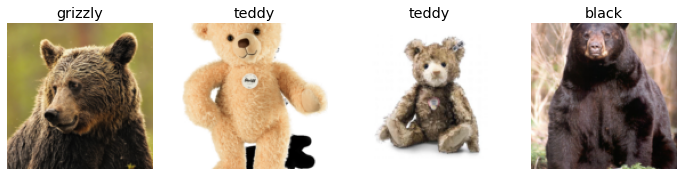

In [29]:
dls.valid.show_batch(max_n=4, nrows=1)

In [30]:
bears = bears.new(
    item_tfms=RandomResizedCrop(224, min_scale=0.5),
    batch_tfms=aug_transforms())
dls = bears.dataloaders(path)

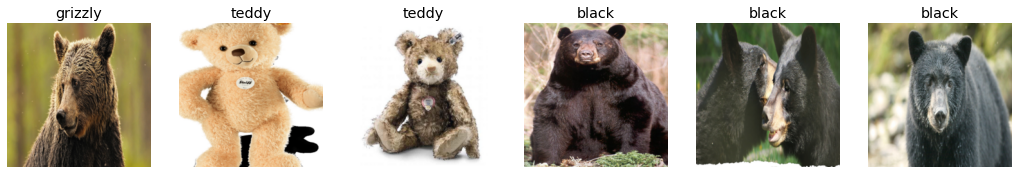

In [32]:
dls.valid.show_batch(max_n=6, nrows=1)

In [ ]:
learn = cnn_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(4)

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

In [ ]:
nterp.plot_top_losses(5, nrows=1)